# <span style="color:darkslategray">ABC LLC - Leads for Health Insurance Services </span>

### <span style="color:dimgray">Importing packages</span>

In [80]:
# Importing general packages
import pandas as pd
import dfply

from dfply import *
import numpy as np

# Importing packages for vizualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

# Importing packages for encoding and standardization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

# Importing packages for modeling
from sklearn.cluster import KMeans

### <span style="color:dimgray">Loading data</span>

<b>Features of df_bids:</b><br/>
● created: time of the bid<br />
● leadID: unique ID of lead<br />
● max_bid: bid offered by Abc LLC for that particular lead<br />
● won: 1 if their bid was the highest and they won the bid, 0 otherwise

In [2]:
# Reading Bids csv file
df_bids = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/bids_hw.csv', index_col=0)
df_bids.head(5)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,created,leadID,max_bid,won
1,2017-12-22 16:08:21,4,22.0,1
2,2018-01-18 16:18:19,30,4.0,1
3,2018-01-22 16:08:57,120,5.0,1
4,2018-01-23 17:28:09,258,5.0,1
5,2018-01-23 18:16:10,266,6.0,1


<b>Features of df_leads:</b><br />
● leadID: unique ID of the lead<br />
● state_18: the state where the lead lives in<br />
● gender_18: lead's gender, which is 1 if male, and 2 if female<br />
● estimated_household_income_18: this is the lead's estimation of their own household income per year in dollars <br />
● cpa_status_18: 1 for closed leads, 0 for lost leads<br />
● premium_amount_18: value of the contract signed, to be paid monthly in dollars<br />

In [3]:
# Reading Leads csv file
df_leads = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/leads_hw.csv', index_col=0)
df_leads.head(5)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18
1,4,IL,1,37.00,45000,1.0,700
2,30,NY,2,43.35,65000,0.0,0
3,120,NY,1,32.96,90000,0.0,0
4,258,NY,1,34.82,65000,0.0,0
5,266,NY,2,40.35,65000,0.0,0


### <span style="color:dimgray"> Merging dataset </span>

In [4]:
# Joining the two dataframe
df = df_leads >> left_join(df_bids, by = "leadID")
df.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1
1,30,NY,2,43.35,65000,0.0,0,2018-01-18 16:18:19,4.0,1
2,120,NY,1,32.96,90000,0.0,0,2018-01-22 16:08:57,5.0,1
3,258,NY,1,34.82,65000,0.0,0,2018-01-23 17:28:09,5.0,1
4,266,NY,2,40.35,65000,0.0,0,2018-01-23 18:16:10,6.0,1
5,348,NY,1,36.00,35000,0.0,0,2018-01-23 22:29:37,4.0,1
6,354,NY,1,36.69,35000,0.0,0,2018-01-23 22:30:47,4.0,1
7,360,MA,2,55.02,35000,0.0,0,2018-01-23 22:39:53,4.0,1
8,370,MA,1,57.89,90000,0.0,0,2018-01-23 22:44:28,4.0,1
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1


### <span style="color:dimgray"> Exploring the dataset </span>

In [5]:
# Checking the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360295 entries, 0 to 1360294
Data columns (total 10 columns):
leadID                           1360295 non-null int64
state_18                         1360295 non-null object
gender_18                        1360295 non-null int64
age_18                           1360295 non-null float64
estimated_household_income_18    1360295 non-null int64
cpa_status_18                    18788 non-null float64
premium_amount_18                1360295 non-null int64
created                          1360295 non-null object
max_bid                          1360295 non-null float64
won                              1360295 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 114.2+ MB


In [6]:
# Describing continuous variables
df.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,1.360295e+06,1.360295e+06,1.360295e+06,1.360295e+06,18788.000000,1.360295e+06,1.360295e+06,1.360295e+06
mean,7.436914e+06,1.497919e+00,4.566375e+01,6.066725e+04,0.026613,4.736417e+03,4.211519e+00,1.983687e-02
std,1.477931e+06,4.999959e-01,1.101899e+01,7.513724e+04,0.160953,5.523757e+06,1.824614e+00,1.394395e-01
min,4.000000e+00,1.000000e+00,1.000000e-01,2.000000e+04,0.000000,0.000000e+00,5.000000e-01,0.000000e+00
25%,6.412174e+06,1.000000e+00,3.600000e+01,4.000000e+04,0.000000,0.000000e+00,3.200000e+00,0.000000e+00
50%,7.475701e+06,1.000000e+00,4.600000e+01,5.000000e+04,0.000000,0.000000e+00,4.000000e+00,0.000000e+00
75%,8.578158e+06,2.000000e+00,5.500000e+01,6.500000e+04,0.000000,0.000000e+00,5.000000e+00,0.000000e+00
max,1.000259e+07,2.000000e+00,1.159400e+02,1.000000e+06,1.000000,6.442451e+09,3.000000e+01,1.000000e+00


In [7]:
#Missing values computation
df.isnull().sum()

leadID                                 0
state_18                               0
gender_18                              0
age_18                                 0
estimated_household_income_18          0
cpa_status_18                    1341507
premium_amount_18                      0
created                                0
max_bid                                0
won                                    0
dtype: int64

#### <span style="color:steelblue"> Univariate analysis on closed leads </span>

In [8]:
df_closed = df >> mask(X.cpa_status_18 == 1)

In [9]:
df_closed.dtypes

leadID                             int64
state_18                          object
gender_18                          int64
age_18                           float64
estimated_household_income_18      int64
cpa_status_18                    float64
premium_amount_18                  int64
created                           object
max_bid                          float64
won                                int64
dtype: object

In [10]:
df_closed.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,5.000000e+02,500.000000,500.000000,500.000000,500.0,5.000000e+02,500.000000,500.0
mean,1.972253e+06,1.458000,44.640020,60412.302000,1.0,1.288585e+07,10.286160,1.0
std,2.439044e+06,0.498732,12.468135,45353.694216,0.0,2.881151e+08,4.792513,0.0
min,4.000000e+00,1.000000,22.820000,20000.000000,1.0,0.000000e+00,1.500000,1.0
25%,2.735450e+05,1.000000,32.245000,40000.000000,1.0,5.022500e+02,6.500000,1.0
50%,1.291555e+06,1.000000,46.120000,48000.000000,1.0,8.410000e+02,10.000000,1.0
75%,2.169809e+06,2.000000,56.460000,65500.000000,1.0,1.311750e+03,12.500000,1.0
max,9.956599e+06,2.000000,64.220000,750000.000000,1.0,6.442451e+09,28.000000,1.0


Text(0.5, 1.0, 'Distribution of Gender')

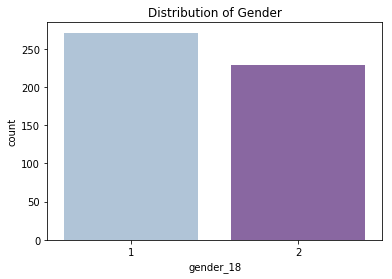

In [11]:
# Distribution of gender 
sns.countplot(x='gender_18', data=df_closed, palette="BuPu")
plt.title('Distribution of Gender')

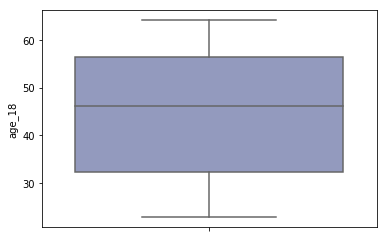

In [12]:
sns.boxplot(x="age_18", data=df_closed, orient="v", palette="BuPu")

Text(0.5, 0, 'Age')

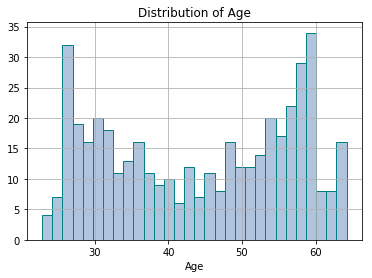

In [27]:
# Distribution of ages

df_closed.hist('age_18', bins=30, color = "lightsteelblue", ec="teal")
plt.title('Distribution of Age')
plt.xlabel('Age')

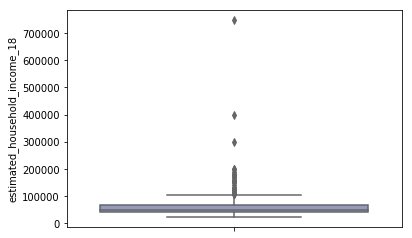

In [14]:
sns.boxplot(x="estimated_household_income_18", data=df_closed, orient="v", palette="BuPu")

In [15]:
#Excluding the outlier case 
df_closed = df_closed >> mask(X.estimated_household_income_18 < 250000)

Text(0.5, 0, 'HH Income')

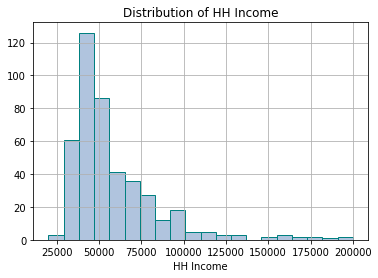

In [28]:
df_closed.hist('estimated_household_income_18', bins=20, color = "lightsteelblue", ec="teal")
plt.title('Distribution of HH Income')
plt.xlabel('HH Income')

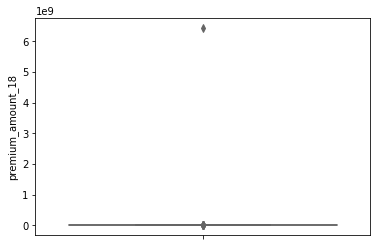

In [17]:
sns.boxplot(x="premium_amount_18", data=df_closed, orient="v", palette="BuPu")

In [18]:
#Excluding the outlier case 
df_closed = df_closed >> mask(X.premium_amount_18 < max(df_closed['premium_amount_18'])) 

Text(0.5, 0, 'Contract Value')

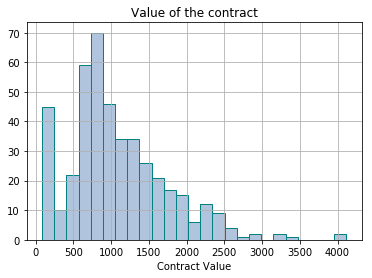

In [29]:
df_closed = df_closed >> mask(X.premium_amount_18 > 0) 

df_closed.hist(column='premium_amount_18', bins=25, color = "lightsteelblue", ec="teal")
plt.title('Value of the contract')
plt.xlabel('Contract Value')


<Figure size 1152x1152 with 0 Axes>

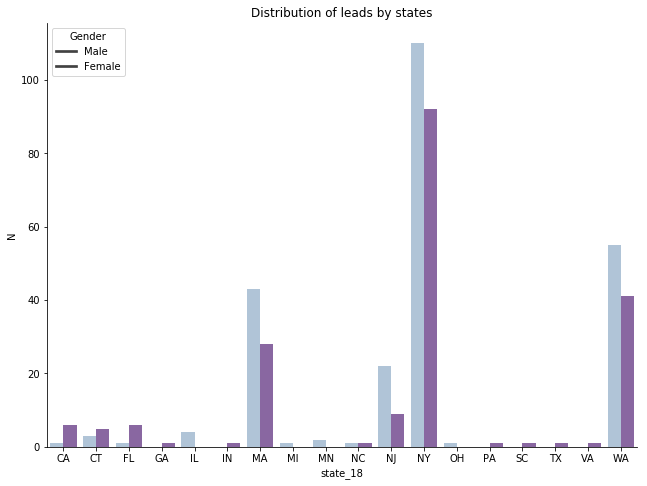

In [20]:
# Distribution of closed leads by states 
df_state = df_closed >> group_by(X.state_18, X.gender_18) >> summarize(N=n(X.leadID))


plt.figure(figsize=(16, 16))
g = sns.catplot(x='state_18', y='N', hue='gender_18', data=df_state, palette="BuPu", kind='bar', legend=False)
plt.title('Distribution of leads by states')
plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
g.fig.set_figwidth(10)
g.fig.set_figheight(7)

### <span style="color:dimgray"> Abc LLC's current most typical client </span>

In [52]:
# Creating new categorical age variable
#bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 44), (45, 64), (65, 150)])
bins=[0, 18, 45, 65, np.inf]
df_closed['Age_c'] = pd.cut(round(df_closed['age_18'], 0), bins=bins, labels=['Under_18', '18-44', '45-64', '65_and_Above'])

In [53]:
# Checking classes of age
df_closed >> group_by(X.Age_c) >> summarize(N=n(X.leadID), Min=X.age_18.min(), Max=X.age_18.max())

,Age_c,N,Min,Max
0,Under_18,0,NaN,NaN
1,18-44,214,22.82,45.23
2,45-64,224,45.65,64.22
3,65_and_Above,0,NaN,NaN


In [32]:
# Creating new categorical income variable
df_closed['Income_c'] = pd.cut(df_closed['estimated_household_income_18'], bins=4, labels=['Lowest', 'Lower_middle', 'Upper_middle', 'Highest'])

In [39]:
# Checking classes of income
df_closed >> group_by(X.Income_c) >> summarize(N=n(X.leadID), Min=X.estimated_household_income_18.min(), Max=X.estimated_household_income_18.max())

,Income_c,N,Min,Max
0,Q1_Lowest,328,20000,65000
1,Q2_Lower_middle,89,67000,110000
2,Q3_Upper_middle,11,110001,150000
3,Q4_Highest,10,156000,200000


In [60]:
#Finding the 5 most typical customer groups
df_typ_cust = df_closed >> group_by(X.state_18, X.gender_18, X.Age_c, X.Income_c) >> summarize(N = n(X.leadID))
df_typ_cust.sort_values(by='N', ascending=False).head(5)

,Income_c,Age_c,gender_18,state_18,N
47,Q1_Lowest,18-44,1,NY,47
56,Q1_Lowest,45-64,2,NY,38
53,Q1_Lowest,18-44,2,NY,36
50,Q1_Lowest,45-64,1,NY,35
65,Q1_Lowest,18-44,1,WA,19


### <span style="color:dimgray"> Customer segmentation using K-means clustering </span>

#### <span style="color:steelblue"> Customer segmentation on closed leads </span>

In [169]:
# One-hot-encoding categorical variables

# Selecting relevant features
df_closed_enc = df_closed >> select(X.leadID, 
                                    X.gender_18, 
                                    X.age_18, 
                                    X.estimated_household_income_18, 
                                    X.premium_amount_18, 
                                    X.state_18)

cat_columns = ["gender_18", "state_18"]
df_closed_enc = pd.get_dummies(df_closed_enc, 
                               prefix_sep="__",
                               columns=cat_columns)

df_closed_enc = df_closed_enc.set_index('leadID')

df_closed_enc.head(10)

,age_18,estimated_household_income_18,premium_amount_18,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,state_18__IL,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
leadID,,,,,,,,,,,,,,,,,,,,,
4,37.00,45000,700,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
382,34.89,76000,554,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
874,35.86,40000,916,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
946,46.94,35000,777,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1218,52.92,47000,840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,56.46,55000,1118,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1728,30.06,35000,1254,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1856,35.79,35000,740,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2028,45.65,35000,1107,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
# Normalizing/Standardizing data to ensure that unit of dimension does not distort relative near-ness of observations

# Using standardization because of presence of possible outliers: 
df_columns = list(df_closed_enc.columns)
rsc = RobustScaler()
df_closed_st = rsc.fit_transform(df_closed_enc)
df_closed_st = pd.DataFrame(df_closed_st, columns=df_columns)
df_closed_st.head(10)

,age_18,estimated_household_income_18,premium_amount_18,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,state_18__IL,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,-0.370393,-0.113208,-0.287889,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.457278,1.056604,-0.481138,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.417336,-0.301887,-0.001985,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038913,-0.490566,-0.185970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.285155,-0.037736,-0.102581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.430924,0.264151,0.265387,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.656166,-0.490566,0.445400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.420218,-0.490566,-0.234944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.014206,-0.490566,0.250827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.297509,-0.075472,0.264064,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


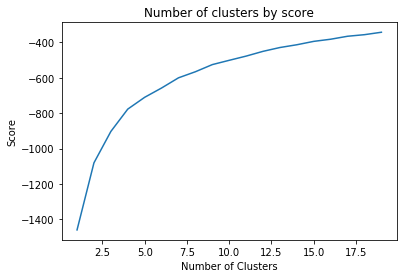

In [171]:
# Determining the number of clusters for K-means
clusters_range = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in clusters_range]
score = [kmeans[i].fit(df_closed_st).score(df_closed_st) for i in range(len(kmeans))]

plt.plot(clusters_range,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Number of clusters by score')
plt.show()

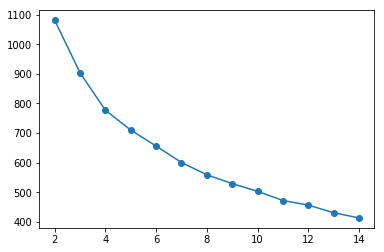

In [98]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[] 
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_closed_st)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [173]:
# Running K-means cluster on the encoded dataframe with 4 clusters based on elbow method
kmens = KMeans(n_clusters=4, random_state=0).fit(df_closed_st)
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters'] = kmens.labels_
df_closed

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Q1_Lowest,2
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Q2_Lower_middle,0
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Q1_Lowest,0
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Q1_Lowest,2
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Q1_Lowest,2
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Q1_Lowest,0
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Q1_Lowest,2
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Q1_Lowest,2
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Q1_Lowest,2
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Q1_Lowest,0


In [190]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df = df_closed >> group_by(X.Clusters) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about from what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters', columns='state_18', values='State_N')
cluster_df['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df.loc[rows, 'Most_Freq_States'] = string
cluster_df



,Clusters,Gender_dist,Avg_Age,Avg_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,2.000000,43.501184,48918.842105,864.532895,10.318421,4.806527,152,"NY, WA, MA, NJ, CT"
1,1,1.432432,45.837297,129947.594595,1477.567568,11.810811,4.677593,37,"NY, WA, MA, NJ, CT"
2,2,1.000000,41.060402,48894.954023,744.632184,9.740805,4.423244,174,"NY, WA, MA, NJ, IL"
3,3,1.346667,53.422000,65038.720000,2071.133333,10.702667,5.518298,75,"NY, WA, MA, NJ, FL"


#### <span style="color:steelblue"> Customer segmentation on lost leads </span>

In [180]:
# Creating dataframe for lost leads
df_lost = df >> mask(X.cpa_status_18 == 0)

,won,N
0,0,1163
1,1,17125


In [184]:
# Checking dataframe
df_lost.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,1.828800e+04,18288.000000,18288.000000,18288.000000,18288.0,18288.0,18288.000000,18288.000000
mean,9.001760e+05,1.521216,44.099319,60459.095199,0.0,0.0,9.219934,0.936406
std,5.901949e+05,0.499563,11.752940,47671.770130,0.0,0.0,3.377421,0.244034
min,3.000000e+01,1.000000,18.750000,35000.000000,0.0,0.0,0.500000,0.000000
25%,3.247570e+05,1.000000,33.710000,40000.000000,0.0,0.0,6.500000,1.000000
50%,9.397920e+05,2.000000,44.550000,50000.000000,0.0,0.0,10.000000,1.000000
75%,1.412484e+06,2.000000,55.000000,68200.000000,0.0,0.0,12.000000,1.000000
max,1.879028e+06,2.000000,64.950000,999999.000000,0.0,0.0,23.000000,1.000000


In [ ]:
# One-hot-encoding categorical variables

# Selecting relevant features
df_closed_enc = df_closed >> select(X.leadID, 
                                    X.gender_18, 
                                    X.age_18, 
                                    X.estimated_household_income_18, 
                                    X.premium_amount_18, 
                                    X.state_18)

cat_columns = ["gender_18", "state_18"]
df_closed_enc = pd.get_dummies(df_closed_enc, 
                               prefix_sep="__",
                               columns=cat_columns)

df_closed_enc = df_closed_enc.set_index('leadID')

df_closed_enc.head(10)